In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from astropy.table import Table, QTable
import astropy.units as u
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from qmostetc import SEDTemplate, QMostObservatory, Ruleset, Rule, Spectrum, Target, RulesRepository, QMostETC, L1DXU
from qmostetc.units import VEGAmag
from qmostetc.catalog import _split_magtype as split_magtype
from qmostetc.exposure import Exposure

* Dark
* Grey
* Bright
* Super-bright

In [ ]:
# cat = Table.read('./../ByCycle_balanced_subset_QSOs.fits', format='fits').to_pandas()

## Mock observations

### Flat spectrum

In [ ]:
# wavelen = np.linspace(3000., 11000., 10000) * u.angstrom
# wavelen

<Quantity [ 3000.        ,  3000.80008001,  3001.60016002, ...,
           10998.39983998, 10999.19991999, 11000.        ] Angstrom>

In [2]:
# flux = np.ones(wavelen.shape) * u.erg/(u.cm**2 * u.s * u.angstrom)
# spec = Spectrum(wavelen, flux)
# # print(spec.to('erg / (ang m² s)').flux)

In [2]:
template_4fs = Table.read('./../4M_templ_z1_00_extended.fits')
template_4fs

LAMBDA,FLUX_DENSITY
Angstrom,erg / (Angstrom s cm2)
float64,float64
5.0,2.328523
10.0,2.328523
15.0,2.328523
20.0,2.328523
25.0,2.328523
30.0,2.328523
35.0,2.328523
40.0,2.328523


In [3]:
spec = Spectrum(np.asarray(template_4fs['LAMBDA']) * u.Angstrom, 
                np.asarray(template_4fs['FLUX_DENSITY']) * u.erg / (u.cm**2 * u.s * u.Angstrom)
                )

In [4]:
spec.wavelength

<Quantity [5.0e+00, 1.0e+01, 1.5e+01, ..., 9.6e+04, 2.0e+05, 4.0e+05] Angstrom>

In [5]:
spec.flux

<Quantity [2.328523, 2.328523, 2.328523, ..., 0.117703, 0.038892, 0.020738] erg / (Angstrom s cm2)>

In [6]:
template = SEDTemplate(spec)#.to('erg / (nm m² s)'))
flux = template(20*u.ABmag, 'DECam.z')

### Observations

In [7]:
qmost_l = QMostObservatory('lrs')  # high-resolution
obs_l = qmost_l(45*u.deg,  # airmass
            1.3*u.arcsec,  # seeing
            'gray')  # moon conditions

obs_l.set_target(flux, 'point')
tbl_low = obs_l.expose((10000*60)*u.s)
tbl_low = tbl_low.to_pandas()
tbl_low

,wavelength,binwidth,efficiency,gain,target,sky,dark,ron,noise,arm
0,370.017059,0.031717,0.020227,1.068125,4603.837588,2553.476471,720.044792,5.306038,61.335626,blue
1,370.048775,0.031717,0.020300,1.068125,4620.314860,2628.135355,720.044792,5.306038,61.954545,blue
2,370.080492,0.031717,0.020373,1.068125,4636.902365,2658.738805,720.044792,5.306038,62.214370,blue
3,370.112208,0.031716,0.020446,1.068125,4653.617682,2675.215011,720.044792,5.306038,62.360048,blue
4,370.143925,0.031716,0.020520,1.068125,4670.594542,2691.598612,720.044792,5.306038,62.504855,blue
...,...,...,...,...,...,...,...,...,...,...
18059,949.801748,0.039845,0.106341,1.063250,22605.648627,18509.876612,936.719375,4.967006,147.417204,red
18060,949.841592,0.039844,0.106224,1.063250,22609.773436,18856.479346,936.719375,4.967006,148.589526,red
18061,949.881436,0.039842,0.106106,1.063250,22586.837738,17965.834865,936.719375,4.967006,145.553802,red
18062,949.921277,0.039841,0.105993,1.063250,22562.087868,15596.225503,936.719375,4.967006,137.163497,red


In [8]:
qmost = QMostObservatory('hrs')  # high-resolution
obs = qmost(45*u.deg,  # airmass
            1.3*u.arcsec,  # seeing
            'gray')  # moon conditions

obs.set_target(flux, 'point')
tbl = obs.expose((10000*60)*u.s)

In [14]:
np.save('/data2/home2/nguerrav/QSO_simpaqs/npy_files/etc_wavelength_grid.npy', 
        np.asarray(tbl['wavelength']) * 10, allow_pickle=True)

In [10]:
tbl_pd = tbl.to_pandas()
tbl_pd

,wavelength,binwidth,efficiency,gain,target,sky,dark,ron,noise,arm
0,392.606928,0.007923,0.102040,1.051500,6082.976358,2753.555458,520.493958,6.208353,62.617016,blue
1,392.614851,0.007922,0.102070,1.051500,6084.692546,2750.854642,520.493958,6.208353,62.596817,blue
2,392.622773,0.007922,0.102100,1.051500,6086.367342,2768.206539,520.493958,6.208353,62.736599,blue
3,392.630695,0.007922,0.102131,1.051500,6088.025198,2879.087851,520.493958,6.208353,63.615470,blue
4,392.638617,0.007922,0.102161,1.051500,6089.683743,3128.693712,520.493958,6.208353,65.549216,blue
...,...,...,...,...,...,...,...,...,...,...
18013,678.950329,0.010058,0.197119,1.072625,18597.758020,8942.909376,674.056458,5.165317,107.254008,red
18014,678.960387,0.010058,0.197090,1.072625,18594.257094,9811.415115,674.056458,5.165317,111.227595,red
18015,678.970445,0.010058,0.197062,1.072625,18590.793479,9817.954387,674.056458,5.165317,111.255430,red
18016,678.980502,0.010057,0.197033,1.072625,18587.463651,8976.202491,674.056458,5.165317,107.404310,red


<Axes: >

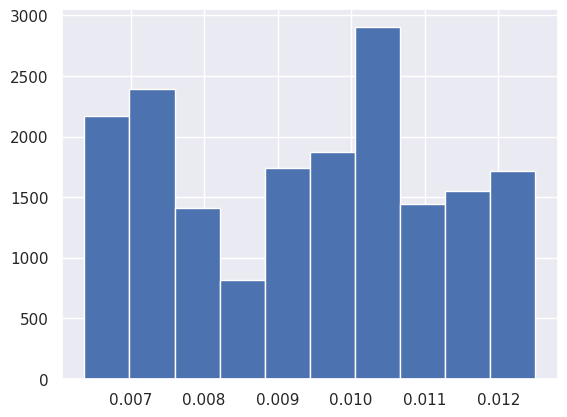

In [11]:
tbl_pd['binwidth'].hist()

In [11]:
R_lrs = np.zeros(tbl_low.shape[0])

for i in range(len(R_lrs)):
    R_lrs[i] = tbl_low.iloc[[i]]['wavelength'].values[0] / tbl_low.iloc[[i]]['binwidth'].values[0]

R_lrs

array([11666.29064788, 11667.33412323, 11668.37763493, ...,
       23840.99615482, 23842.85489505, 23844.71379441])

In [12]:
R_etc = np.zeros(tbl_pd.shape[0])

for i in range(len(R_etc)):
    R_etc[i] = tbl_pd.iloc[[i]]['wavelength'].values[0] / tbl_pd.iloc[[i]]['binwidth'].values[0]

R_etc

array([49555.85781499, 49558.21721209, 49560.57684313, ...,
       67508.38539297, 67512.36688133, 67516.34864593])

(array([2168., 2392., 1411.,  812., 1744., 1870., 2906., 1445., 1553.,
        1717.]),
 array([0.0063723 , 0.00698538, 0.00759846, 0.00821154, 0.00882462,
        0.0094377 , 0.01005079, 0.01066387, 0.01127695, 0.01189003,
        0.01250311]),
 <BarContainer object of 10 artists>)

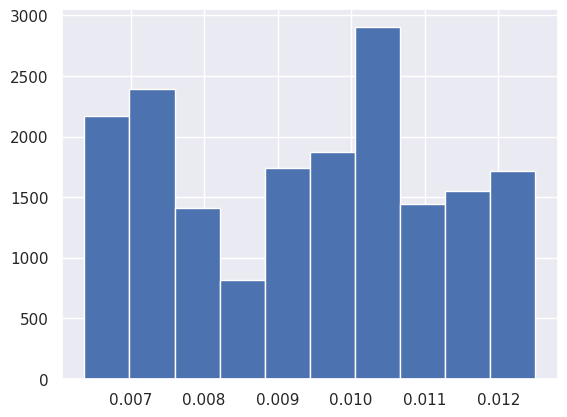

In [23]:
plt.hist(tbl_pd['binwidth'])

In [13]:
tbl_low['R'] = tbl_low.apply(lambda x: x['wavelength'] / x['binwidth'], axis=1)
tbl_low

,wavelength,binwidth,efficiency,gain,target,sky,dark,ron,noise,arm,R
0,370.017059,0.031717,0.020227,1.068125,4603.837588,2553.476471,720.044792,5.306038,61.335626,blue,11666.290648
1,370.048775,0.031717,0.020300,1.068125,4620.314860,2628.135355,720.044792,5.306038,61.954545,blue,11667.334123
2,370.080492,0.031717,0.020373,1.068125,4636.902365,2658.738805,720.044792,5.306038,62.214370,blue,11668.377635
3,370.112208,0.031716,0.020446,1.068125,4653.617682,2675.215011,720.044792,5.306038,62.360048,blue,11669.421183
4,370.143925,0.031716,0.020520,1.068125,4670.594542,2691.598612,720.044792,5.306038,62.504855,blue,11670.464768
...,...,...,...,...,...,...,...,...,...,...,...
18059,949.801748,0.039845,0.106341,1.063250,22605.648627,18509.876612,936.719375,4.967006,147.417204,red,23837.279151
18060,949.841592,0.039844,0.106224,1.063250,22609.773436,18856.479346,936.719375,4.967006,148.589526,red,23839.137573
18061,949.881436,0.039842,0.106106,1.063250,22586.837738,17965.834865,936.719375,4.967006,145.553802,red,23840.996155
18062,949.921277,0.039841,0.105993,1.063250,22562.087868,15596.225503,936.719375,4.967006,137.163497,red,23842.854895


In [14]:
tbl_pd['R'] = tbl_pd.apply(lambda x: x['wavelength'] / x['binwidth'], axis=1)
tbl_pd

,wavelength,binwidth,efficiency,gain,target,sky,dark,ron,noise,arm,R
0,392.606928,0.007923,0.102040,1.051500,6082.976358,2753.555458,520.493958,6.208353,62.617016,blue,49555.857815
1,392.614851,0.007922,0.102070,1.051500,6084.692546,2750.854642,520.493958,6.208353,62.596817,blue,49558.217212
2,392.622773,0.007922,0.102100,1.051500,6086.367342,2768.206539,520.493958,6.208353,62.736599,blue,49560.576843
3,392.630695,0.007922,0.102131,1.051500,6088.025198,2879.087851,520.493958,6.208353,63.615470,blue,49562.936707
4,392.638617,0.007922,0.102161,1.051500,6089.683743,3128.693712,520.493958,6.208353,65.549216,blue,49565.296805
...,...,...,...,...,...,...,...,...,...,...,...
18013,678.950329,0.010058,0.197119,1.072625,18597.758020,8942.909376,674.056458,5.165317,107.254008,red,67500.423246
18014,678.960387,0.010058,0.197090,1.072625,18594.257094,9811.415115,674.056458,5.165317,111.227595,red,67504.404181
18015,678.970445,0.010058,0.197062,1.072625,18590.793479,9817.954387,674.056458,5.165317,111.255430,red,67508.385393
18016,678.980502,0.010057,0.197033,1.072625,18587.463651,8976.202491,674.056458,5.165317,107.404310,red,67512.366881


Text(0.5, 0, 'R')

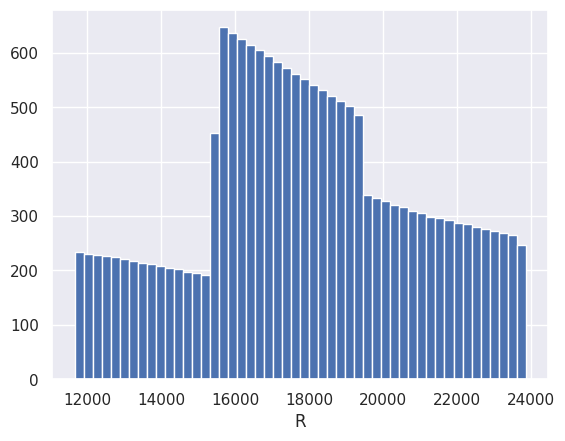

In [15]:
plt.hist(R_lrs, bins=50, edgecolor='w');
# plt.yscale('log')

plt.xlabel('R')

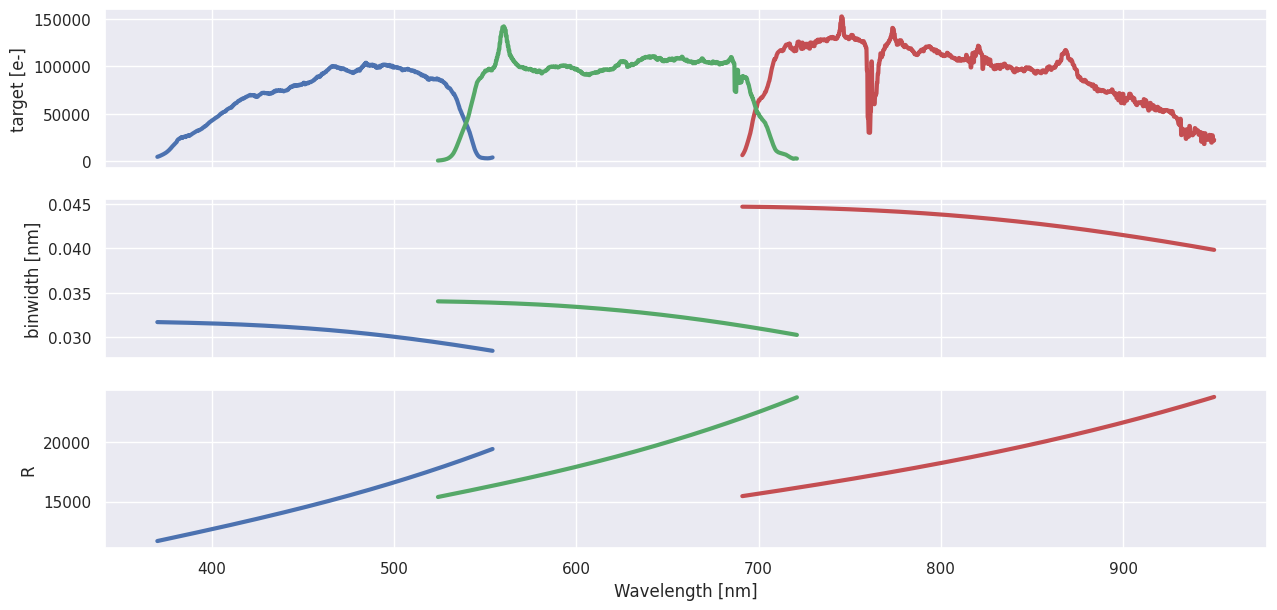

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(15, 7))

colors = ['r', 'b', 'g']
arms = ['red', 'blue', 'green']

for i in range(3):
    arm = arms[i]
    color = colors[i]

    tbl_arm = tbl_low.loc[tbl_low['arm']==arm]

    ax1.plot(tbl_arm['wavelength'], tbl_arm['target'], c=color, lw=3)

    ax2.plot(tbl_arm['wavelength'], tbl_arm['binwidth'], c=color, lw=3)

    ax3.plot(tbl_arm['wavelength'], tbl_arm['R'], c=color, lw=3)

ax1.set_ylabel('target [e-]')
ax2.set_ylabel('binwidth [nm]')
ax3.set_ylabel('R')
ax3.set_xlabel('Wavelength [nm]')

plt.savefig('spec_obs_expose_output_low_res.png', dpi=200)

plt.show()

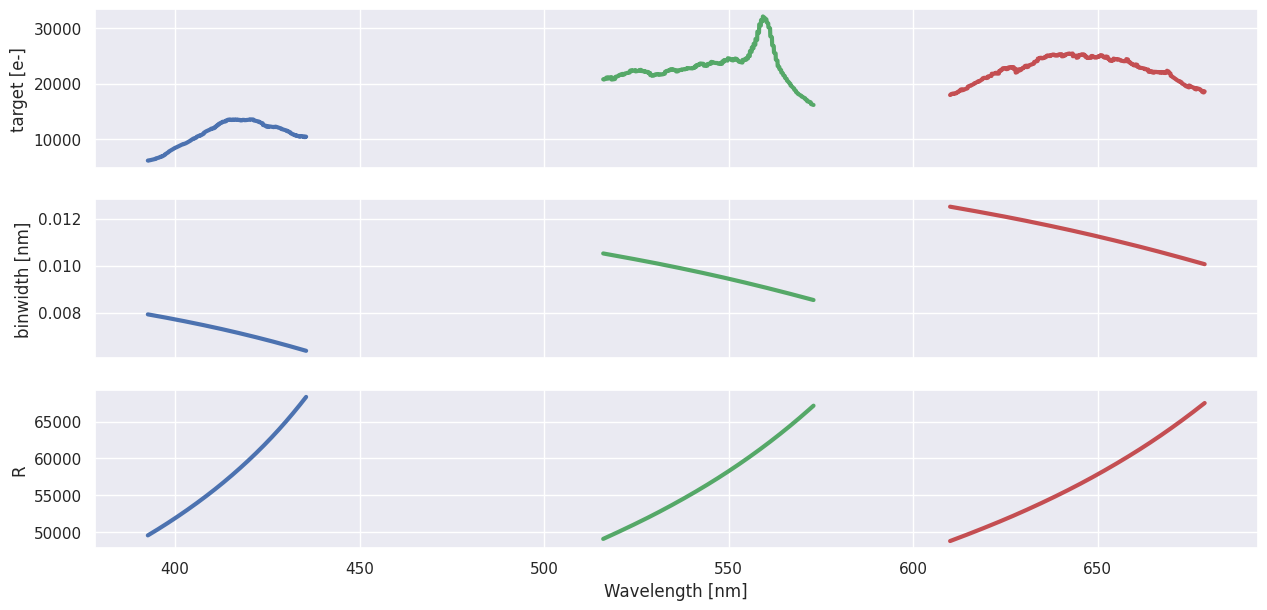

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(15, 7))

colors = ['r', 'b', 'g']
arms = ['red', 'blue', 'green']

for i in range(3):
    arm = arms[i]
    color = colors[i]

    tbl_arm = tbl_pd.loc[tbl_pd['arm']==arm]

    ax1.plot(tbl_arm['wavelength'], tbl_arm['target'], c=color, lw=3)

    ax2.plot(tbl_arm['wavelength'], tbl_arm['binwidth'], c=color, lw=3)

    ax3.plot(tbl_arm['wavelength'], tbl_arm['R'], c=color, lw=3)

ax1.set_ylabel('target [e-]')
ax2.set_ylabel('binwidth [nm]')
ax3.set_ylabel('R')
ax3.set_xlabel('Wavelength [nm]')

plt.savefig('spec_obs_expose_output_high_res.png', dpi=200)

plt.show()

### Check L1 Output

In [12]:
dxu = L1DXU(qmost, tbl, (100000*60)*u.s)
dxu

In [13]:
dxu.joined_spectrum()

/home/nguerrav/miniconda3/envs/etc_4fs/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


WAVE,FLUX,ERR_FLUX,QUAL,FLUX_NOSS,ERR_FLUX_NOSS
Angstrom,erg / (Angstrom s cm2),erg / (Angstrom s cm2),,erg / (Angstrom s cm2),erg / (Angstrom s cm2)
float32,float32,float32,int32,float32,float32
3926.10,8.82359e-19,1.10100e-19,0,4.72864e-18,1.10100e-19
3926.15,8.80377e-19,1.10053e-19,0,4.72393e-18,1.10053e-19
3926.20,8.83337e-19,1.10058e-19,0,4.72796e-18,1.10058e-19
3926.25,9.03405e-19,1.10186e-19,0,4.76261e-18,1.10186e-19
3926.30,8.02925e-19,1.10866e-19,0,4.73053e-18,1.10866e-19
3926.35,6.55260e-19,1.11892e-19,0,4.68821e-18,1.11892e-19
3926.40,7.34472e-19,1.14031e-19,0,4.98650e-18,1.14031e-19
3926.45,8.12480e-19,1.15664e-19,0,5.23625e-18,1.15664e-19


In [59]:
dxu_pd = dxu.joined_spectrum().to_pandas();
dxu_pd

/home/nguerrav/miniconda3/envs/etc_4fs/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


,WAVE,FLUX,ERR_FLUX,QUAL,FLUX_NOSS,ERR_FLUX_NOSS
0,3926.100098,7.841640e-19,1.100996e-19,0,4.630445e-18,1.100996e-19
1,3926.149902,7.723214e-19,1.100527e-19,0,4.615879e-18,1.100527e-19
2,3926.199951,8.045699e-19,1.100584e-19,0,4.649192e-18,1.100584e-19
3,3926.250000,9.863574e-19,1.101859e-19,0,4.845563e-18,1.101859e-19
4,3926.300049,9.615978e-19,1.108655e-19,0,4.889200e-18,1.108655e-19
...,...,...,...,...,...,...
33770,6789.700195,6.271703e-19,5.200811e-20,0,3.860769e-18,5.200811e-20
33771,6789.750000,5.497010e-19,5.201516e-20,0,3.784648e-18,5.201516e-20
33772,6789.799805,5.518579e-19,5.121379e-20,0,3.662341e-18,5.121379e-20
33773,6789.850098,5.623492e-19,5.031297e-20,0,3.535186e-18,5.031297e-20


/opt/anaconda3/envs/etc_4fs/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/etc_4fs/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


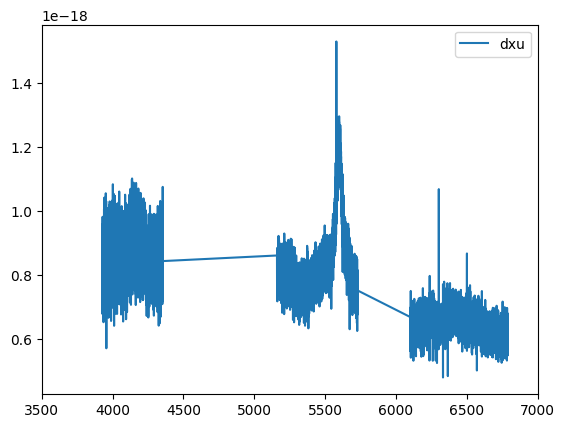

In [214]:
plt.plot(dxu.joined_spectrum()['WAVE'], dxu.joined_spectrum()['FLUX'], label='dxu')
#plt.plot(spec.wavelength, spec.flux, label='spec')

plt.legend()
# plt.yscale('log')

plt.xlim(3500, 7000)

plt.show()

In [12]:
tbl['SNR'] = tbl['target'] / tbl['noise']
tbl

wavelength,binwidth,efficiency,gain,target,sky,dark,ron,noise,arm,SNR
nm,nm,electron / ph,electron / adu,electron,electron,electron,electron,electron,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64
392.60692846030474,0.007922513014023025,0.1020396156178534,1.0514999999999999,1.805529226681413,14.593843928305944,2.7586179791666665,6.208353296809067,7.596159673950649,blue,0.23768974115605762
392.61485086465916,0.007922295694868353,0.10206980419587068,1.0514999999999999,1.806100828950598,14.579529603638992,2.7586179791666665,6.208353296809067,7.595255036518278,blue,0.23779330914719726
392.6227730516839,0.007922078354624773,0.10210015341074719,1.0514999999999999,1.806740245768082,14.671494658468434,2.7586179791666665,6.208353296809067,7.601348797509767,blue,0.23768679663272094
392.63069502135795,0.007921860993405971,0.10213065037771042,1.0514999999999999,1.8073969826660659,15.259165611252218,2.7586179791666665,6.208353296809067,7.639949687732567,blue,0.23657184360365552
392.63861677366026,0.007921643611211948,0.10216126507272123,1.0514999999999999,1.8079817714615165,16.582076675705693,2.7586179791666665,6.208353296809067,7.726080965427031,blue,0.23401020252725074
392.64653830856986,0.00792142620798586,0.10219198240460484,1.0514999999999999,1.8084995900329757,17.317957185792558,2.7586179791666665,6.208353296809067,7.773591538857197,blue,0.23264659340447477
392.65445962606566,0.007921208783670863,0.10222281478523706,1.0514999999999999,1.8089984661243357,16.251485076522012,2.7586179791666665,6.208353296809067,7.704722719203659,blue,0.23479085906822994
392.6623807261268,0.007920991338608019,0.10225372022098599,1.0514999999999999,1.8094994757728342,14.914439506941877,2.7586179791666665,6.208353296809067,7.617493526080701,blue,0.23754525941866406


In [19]:
wavelen = np.linspace(300., 1100., 10000) * u.nm
flat_flux = np.ones(wavelen.shape) * u.photon/(u.m**2*u.s*u.nm)

## Saving debugging

In [41]:
def SNR_4MOST_like(mag, t_exp, wavelen=wavelen, template_flux=flat_flux, mag_type='DECam.z', airmass=45, seeing=1.3, moon='gray'):
    '''
    mag: magnitude
    t_exp: exposure time [mins]
    wavelen: wavelength grid [nm]
    flux: flux array [any]
    mag_type: filter name
    airmass [degrees]
    seeing [arcsec]
    moon condition: 'dark', 'gray', 'bright' or 'super-bright'
    '''
    mag = mag

    spec = Spectrum(wavelen, template_flux)

    template = SEDTemplate(spec)

    flux = template(mag*u.ABmag, mag_type)

    qmost = QMostObservatory('hrs')  # high-resolution
    obs = qmost(airmass*u.deg,  # airmass
                seeing*u.arcsec,  # seeing
                moon)  # moon conditions

    obs.set_target(flux, 'point')

    observation = obs.expose((t_exp*60)*u.s)

    dxu = L1DXU(qmost, observation, (t_exp*60)*u.s)

    return observation[['wavelength', 'binwidth', 'target', 'sky', 'dark', 'ron', 'noise', 'arm']], dxu

### Testing wavelength grid

In [35]:
tng_grid = np.load('/data2/home2/nguerrav/TNG50_spec/npy_files/TNG50_wavelength_grid.npy')
tng_grid = tng_grid * u.AA
tng_grid

<Quantity [3926.04, 3926.12, 3926.2 , ..., 6789.8 , 6789.88, 6789.96] Angstrom>

In [37]:
while tng_grid[-1].value < 10150:
    tng_grid = np.append(tng_grid, [(tng_grid[-1].value + (tng_grid[-1].value - tng_grid[-2].value)) * u.AA])

In [36]:
tng_grid[-1]

<Quantity 6789.96 Angstrom>

In [38]:
tng_grid

<Quantity [ 3926.04      ,  3926.12      ,  3926.2       , ...,
           10149.87999995, 10149.95999995, 10150.03999995] Angstrom>

In [42]:
obs_tng_grid, dxu = SNR_4MOST_like(19, 90, tng_grid, np.ones(tng_grid.shape) * u.photon/(u.m**2*u.s*u.nm))

In [43]:
obs_tng_grid

wavelength,binwidth,target,sky,dark,ron,noise,arm
nm,nm,Angstrom electron / nm,electron,electron,electron,electron,
float64,float64,float64,float64,float64,float64,float64,str5
392.60692846030474,0.007922513014023025,77.01673611300913,24.781999123538395,4.6844456249999995,6.208353296809067,8.701251003036248,blue
392.61485086465916,0.007922295694868353,77.04091281921932,24.757691779764325,4.6844456249999995,6.208353296809067,8.699993065783802,blue
392.6227730516839,0.007922078354624773,77.06538126431275,24.913858854003003,4.6844456249999995,6.208353296809067,8.709104044816224,blue
392.63069502135795,0.007921860993405971,77.08976580385055,25.911790660616973,4.6844456249999995,6.208353296809067,8.76634835744063,blue
392.63861677366026,0.007921643611211948,77.11411517857357,28.158243411575704,4.6844456249999995,6.208353296809067,8.893691652650944,blue
392.64653830856986,0.00792142620798586,77.13858088710234,29.40785182493076,4.6844456249999995,6.208353296809067,8.963805341295682,blue
392.65445962606566,0.007921208783670863,77.16324551291622,27.596861450697755,4.6844456249999995,6.208353296809067,8.862351961245356,blue
392.6623807261268,0.007920991338608019,77.18798954433957,25.326406709901303,4.6844456249999995,6.208353296809067,8.733458761987446,blue


In [62]:
spec = dxu.joined_spectrum().to_pandas();
spec

/home/nguerrav/miniconda3/envs/etc_4fs/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


,WAVE,FLUX,ERR_FLUX,QUAL,FLUX_NOSS,ERR_FLUX_NOSS
0,3926.100098,2.796855e-17,1.699902e-17,0,6.643136e-17,1.699902e-17
1,3926.149902,1.819879e-17,1.699436e-17,0,5.663436e-17,1.699436e-17
2,3926.199951,1.206672e-17,1.699247e-17,0,5.051294e-17,1.699247e-17
3,3926.250000,2.437422e-17,1.700044e-17,0,6.296627e-17,1.700044e-17
4,3926.300049,2.331265e-17,1.704721e-17,0,6.258868e-17,1.704721e-17
...,...,...,...,...,...,...
33770,6789.700195,1.326418e-17,6.426611e-18,0,4.560017e-17,6.426611e-18
33771,6789.750000,1.146987e-17,6.407847e-18,0,4.381935e-17,6.407847e-18
33772,6789.799805,1.149489e-17,6.267050e-18,0,4.259973e-17,6.267050e-18
33773,6789.850098,1.171032e-17,6.109769e-18,0,4.143869e-17,6.109769e-18


In [68]:
spec = dxu.joined()#.to_pandas();
spec = Table.read(spec[1])
spec['WAVE'][0]

/home/nguerrav/miniconda3/envs/etc_4fs/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


array([3926.1 , 3926.15, 3926.2 , ..., 6789.8 , 6789.85, 6789.9 ],
      dtype=float32)

In [59]:
spec['WAVE'][0]

<Quantity [3926.1 , 3926.15, 3926.2 , ..., 6789.8 , 6789.85, 6789.9 ] Angstrom>

In [15]:
cols_to_save_from_cat = ['RA', 'DEC', 'SUBSURVEY', 'MAG', 'REDSHIFT_ESTIMATE', 'REDSHIFT_ERROR', 'TEXP_D', 'TEXP_G', 'TEXP_B', 'TEXP_S']
cols_to_save_from_etc = ['wavelength', 'binwidth', 'target', 'sky', 'dark', 'ron', 'noise',  # 'SNR', 
                         'arm_int']

In [12]:
airmass = 45
seeing = 1.3
moon = 'gray'
save_name = 'SNR_curves_ByCycle_cat_moon_' + moon + '_airmass_' + str(airmass) + '_seeing_' + str(seeing).replace('.', '_')

In [16]:
def binarize_arm(arm_str):

    if arm_str == 'blue':
        return 1
    elif arm_str == 'green':
        return 2
    elif arm_str == 'red':
        return 3

In [17]:
def bin_arm_str_array(arm_str_array):

    arm_int_array = np.zeros(len(arm_str_array))

    for i in range(len(arm_str_array)):
        arm_int_array[i] = int(binarize_arm(arm_str_array[i]))

    return arm_int_array

In [ ]:
with h5py.File(save_name + '.hdf5', 'w') as f:

    f.clear()

    for cat_col in cols_to_save_from_cat:


        if cat[cat_col].dtype.kind == 'S' or cat[cat_col].dtype.kind == 'U' or cat[cat_col].dtype.kind == 'O':
            f.create_dataset(cat_col, data=np.array(cat[cat_col].astype('S')))

        else:
            f.create_dataset(cat_col, data=cat[cat_col])

    n_objects = cat.shape[0]

    test_obs = SNR_4MOST_like(cat['MAG'][0], cat['TEXP_G'][0])
    test_obs['arm_int'] = bin_arm_str_array(np.asarray(test_obs['arm']))

    for etc_col in cols_to_save_from_etc:

        test_data = test_obs[etc_col]

        if np.issubdtype(np.array(test_data).dtype, np.character) or isinstance(test_data[0], str):

            if np.array(test_data).ndim == 0:
                dtype = h5py.special_dtype(vlen=str)
                f.create_dataset(etc_col, shape=(n_objects,), dtype=dtype)
            else:
                max_length = max([len(s) for s in test_data])
                dtype = h5py.special_dtype(vlen=str)
                shape = (n_objects,) + np.array(test_data).shape
                f.create_dataset(etc_col, shape=shape, dtype=dtype)
        
        else:

            shape = (n_objects,) + test_data.shape
            f.create_dataset(etc_col, shape=shape)

    for i in range(n_objects):

        if i % 10000 == 0.0:
            print(str(i * 100 / n_objects), '% \n')

        obs = SNR_4MOST_like(cat['MAG'][i], cat['TEXP_G'][i])

        obs['arm_int'] = bin_arm_str_array(np.asarray(obs['arm']))

        for etc_col_ in cols_to_save_from_etc:

            f[etc_col_][i] = np.asarray(obs[etc_col_])

RA
DEC
SUBSURVEY
MAG
REDSHIFT_ESTIMATE
REDSHIFT_ERROR
TEXP_D
TEXP_G
TEXP_B
TEXP_S
first for loop etc_col
wavelength
shape (1674374, 18018)
binwidth
shape (1674374, 18018)
target
shape (1674374, 18018)
sky
shape (1674374, 18018)
dark
shape (1674374, 18018)
ron
shape (1674374, 18018)
noise
shape (1674374, 18018)
arm_int
shape (1674374, 18018)
for loop through objects
0
second for loop etc_col
wavelength
binwidth
target
sky
dark
ron
noise
arm_int
1
second for loop etc_col
wavelength
binwidth
target
sky
dark
ron
noise
arm_int
2
second for loop etc_col
wavelength
binwidth
target
sky
dark
ron
noise
arm_int
3
second for loop etc_col
wavelength
binwidth
target
sky
dark
ron
noise
arm_int
4
second for loop etc_col
wavelength
binwidth
target
sky
dark
ron
noise
arm_int
5
second for loop etc_col
wavelength
binwidth
target
sky
dark
ron
noise
arm_int
6
second for loop etc_col
wavelength
binwidth
target
sky
dark
ron
noise
arm_int
7
second for loop etc_col
wavelength
binwidth
target
sky
dark
ron
noise


In [15]:
testing = h5py.File(save_name+'.hdf5', 'r')

In [16]:
testing.keys()

<KeysViewHDF5 ['DEC', 'MAG', 'RA', 'REDSHIFT_ERROR', 'REDSHIFT_ESTIMATE', 'SUBSURVEY', 'TEXP_B', 'TEXP_D', 'TEXP_G', 'TEXP_S', 'arm_int', 'binwidth', 'dark', 'noise', 'ron', 'sky', 'target', 'wavelength']>

In [17]:
testing['wavelength'][:].shape

(1674374, 18018)

In [19]:
testing['wavelength'][0].shape

(18018,)

In [35]:
for key in testing.keys():
    print(key)
    print(testing[key][:].shape)
    print(' ')

DEC
(1674374,)
 
MAG
(1674374,)
 
RA
(1674374,)
 
REDSHIFT_ERROR
(1674374,)
 
REDSHIFT_ESTIMATE
(1674374,)
 
SUBSURVEY
(1674374,)
 
TEXP_B
(1674374,)
 
TEXP_D
(1674374,)
 
TEXP_G
(1674374,)
 
TEXP_S
(1674374,)
 
arm_int
(1674374, 18018)
 
binwidth


KeyboardInterrupt: 

## Plotting

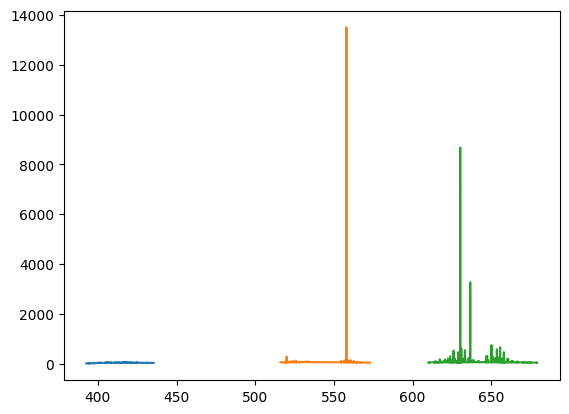

In [150]:
plt.plot(tbl[tbl['arm']=="blue"]['wavelength'],tbl[tbl['arm']=="blue"]['sky'])
plt.plot(tbl[tbl['arm']=="green"]['wavelength'],tbl[tbl['arm']=="green"]['sky'])
plt.plot(tbl[tbl['arm']=="red"]['wavelength'],tbl[tbl['arm']=="red"]['sky'])

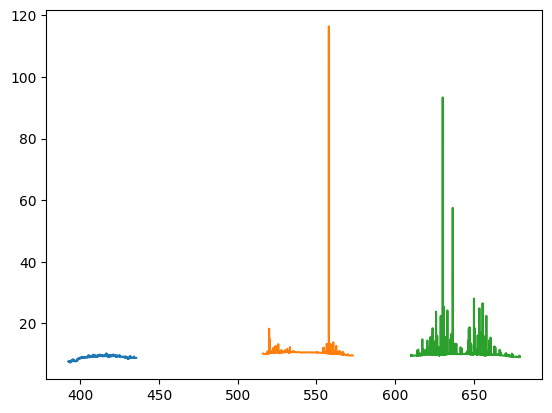

In [149]:
plt.plot(tbl[tbl['arm']=="blue"]['wavelength'],tbl[tbl['arm']=="blue"]['noise'])
plt.plot(tbl[tbl['arm']=="green"]['wavelength'],tbl[tbl['arm']=="green"]['noise'])
plt.plot(tbl[tbl['arm']=="red"]['wavelength'],tbl[tbl['arm']=="red"]['noise'])

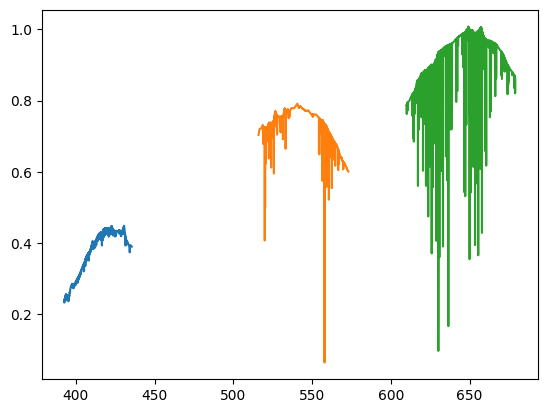

In [148]:
plt.plot(tbl[tbl['arm']=="blue"]['wavelength'],tbl[tbl['arm']=="blue"]['target']/tbl[tbl['arm']=="blue"]['noise'])
plt.plot(tbl[tbl['arm']=="green"]['wavelength'],tbl[tbl['arm']=="green"]['target']/tbl[tbl['arm']=="green"]['noise'])
plt.plot(tbl[tbl['arm']=="red"]['wavelength'],tbl[tbl['arm']=="red"]['target']/tbl[tbl['arm']=="red"]['noise'])

# plt.xlim(620, 650)
# plt.ylim(30, 40)

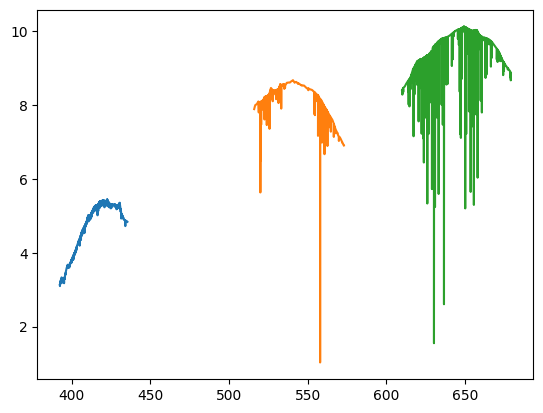

In [ ]:
flux = template(17*u.ABmag, 'DECam.z')
obs.set_target(flux, 'point')
tbl = obs.expose((53.7*60)*u.s)

plt.plot(tbl[tbl['arm']=="blue"]['wavelength'],tbl[tbl['arm']=="blue"]['target']/tbl[tbl['arm']=="blue"]['noise'])
plt.plot(tbl[tbl['arm']=="green"]['wavelength'],tbl[tbl['arm']=="green"]['target']/tbl[tbl['arm']=="green"]['noise'])
plt.plot(tbl[tbl['arm']=="red"]['wavelength'],tbl[tbl['arm']=="red"]['target']/tbl[tbl['arm']=="red"]['noise'])


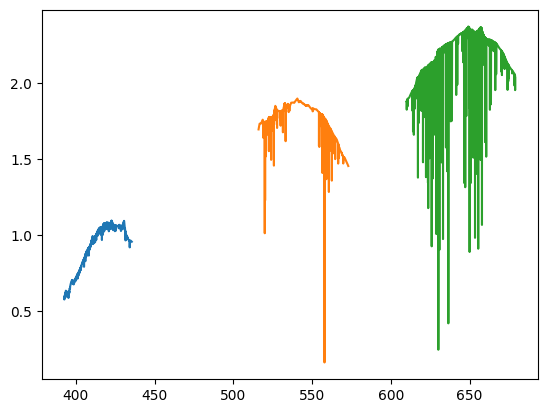

In [ ]:
flux = template(19*u.ABmag, 'DECam.z')
obs.set_target(flux, 'point')
tbl = obs.expose((53.7*60)*u.s)

plt.plot(tbl[tbl['arm']=="blue"]['wavelength'],tbl[tbl['arm']=="blue"]['target']/tbl[tbl['arm']=="blue"]['noise'])
plt.plot(tbl[tbl['arm']=="green"]['wavelength'],tbl[tbl['arm']=="green"]['target']/tbl[tbl['arm']=="green"]['noise'])
plt.plot(tbl[tbl['arm']=="red"]['wavelength'],tbl[tbl['arm']=="red"]['target']/tbl[tbl['arm']=="red"]['noise'])